<a href="https://colab.research.google.com/github/kcj4800/AI-Personal-Trainer/blob/main/Aiffel_07_%EC%88%AB%EC%9E%90%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 배열의 크기 :', len(x_train))

2.14.0
11490434/11490434 [==============================] - 0s 0us/step
x_train 배열의 크기 : 60000


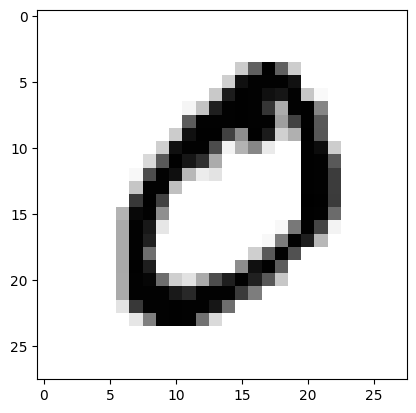

0


In [4]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()
print(y_train[1])

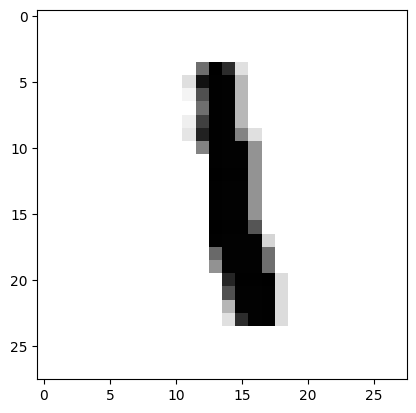

7 번째 이미지 : 1


In [5]:
index = 6
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print((index+1), '번째 이미지 :', y_train[index])

In [6]:
print(x_train.shape, np.shape(x_train))

(60000, 28, 28) (60000, 28, 28)


In [7]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print(np.min(x_train) , np.max(x_train))

0 255


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
print('모델의 레이어 갯수 : ', len(model.layers))

모델의 레이어 갯수 :  7


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [10]:
print('리쉪 전 : ', x_train_norm.shape, '\n', np.shape(x_test_norm))

x_train_reshape = x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshape = x_test_norm.reshape( -1, 28, 28, 1)

print('리쉡 후 : ', x_train_norm.shape, '\n', np.shape(x_test_norm))

리쉪 전 :  (60000, 28, 28) 
 (10000, 28, 28)
리쉡 후 :  (60000, 28, 28) 
 (10000, 28, 28)


In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_reshape, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.1951 - accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0641 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0470 - accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0293 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshape, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print(f'test_accuracy : {test_accuracy}')

313/313 - 1s - loss: 0.0342 - accuracy: 0.9892 - 850ms/epoch - 3ms/step
test_loss : 0.03422381728887558
test_accuracy : 0.9891999959945679


313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [1.6671419e-14 4.7699919e-13 2.7840463e-10 4.2739814e-10 2.1056658e-17
 3.7999944e-14 1.4916688e-21 1.0000000e+00 1.3259237e-13 8.1532487e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


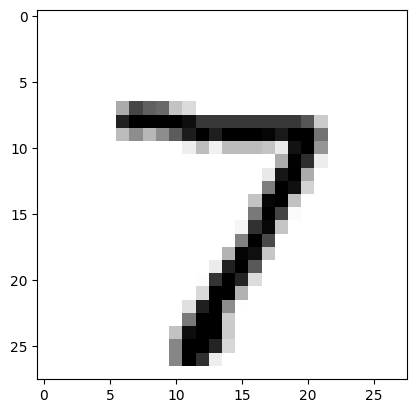

In [13]:
predicted_result = model.predict(x_test_reshape) # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis = 1)

idx = 0 # 1번째 x_test를 살펴보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측확률분포 : [1.2089612e-02 1.9742718e-03 3.9056208e-06 6.6401206e-02 1.7574407e-02
 1.0405027e-02 7.5501166e-06 6.1829388e-01 2.0547728e-03 2.7119538e-01]
라벨 : 9, 예측결과 : 7


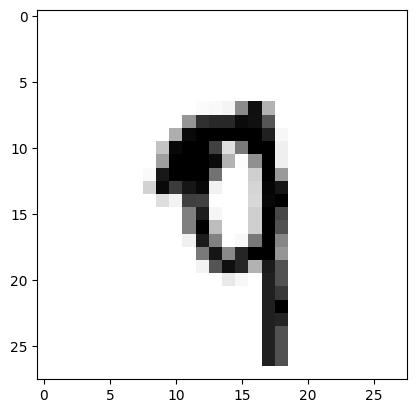

예측확률분포 : [8.4717712e-18 1.0132183e-11 5.9533750e-22 4.4186962e-01 1.0646518e-16
 5.5812925e-01 1.1142070e-14 5.9846653e-13 1.7907145e-07 9.6744202e-07]
라벨 : 3, 예측결과 : 5


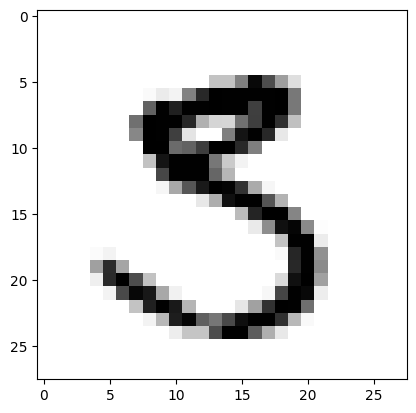

예측확률분포 : [2.9603014e-04 2.0939426e-01 5.2490667e-02 6.4443127e-05 2.4087552e-05
 4.7522235e-01 2.5517753e-01 7.3233903e-03 6.8136910e-06 4.8746756e-07]
라벨 : 6, 예측결과 : 5


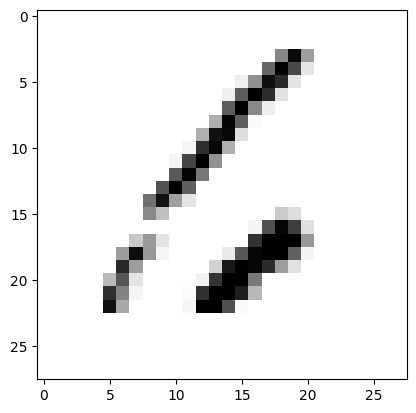

예측확률분포 : [1.2540677e-10 2.3673323e-08 1.3953505e-12 9.3745041e-01 1.0664146e-10
 6.2076759e-02 5.2303718e-16 9.4019356e-07 8.8578425e-09 4.7197790e-04]
라벨 : 5, 예측결과 : 3


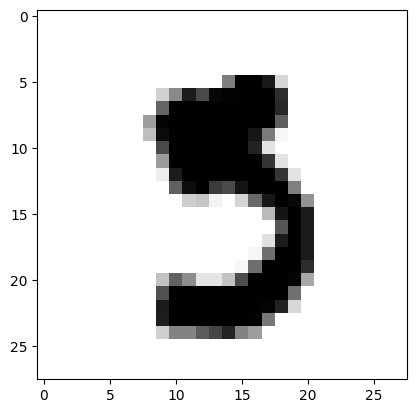

예측확률분포 : [9.8467731e-01 3.5655363e-09 5.8167271e-10 2.2152297e-10 2.3757709e-09
 1.3487504e-06 1.5321203e-02 1.5651849e-12 1.3357725e-07 5.3717492e-10]
라벨 : 6, 예측결과 : 0


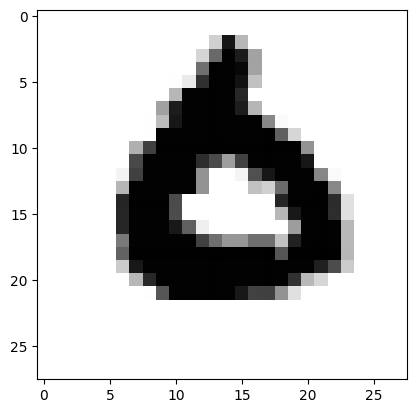

In [15]:
import random
wrong_predict_list = []

for i, _ in enumerate(predicted_labels):  # predicted_labels에 인덱싱 하는 것.
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

samples = random.choices(population = wrong_predict_list, k = 5) # population 리스트 안에서 무작위 k개 선택

for n in samples:
  print('예측확률분포 : ' + str(predicted_result[n]))
  print('라벨 : ' + str(y_test[n]) + ', 예측결과 : ' + str(predicted_labels[n]))
  plt.imshow(x_test[n], cmap = plt.cm.binary)
  plt.show()

In [16]:
print(predicted_labels, len(predicted_labels))
print(samples)
print(wrong_predict_list, '\n', len(wrong_predict_list))

[7 2 1 ... 4 5 6] 10000
[1414, 938, 9698, 5937, 3422]
[151, 321, 340, 435, 445, 449, 495, 543, 582, 659, 716, 740, 844, 882, 938, 947, 1014, 1033, 1062, 1112, 1226, 1232, 1242, 1247, 1299, 1319, 1414, 1459, 1530, 1621, 1686, 1709, 1737, 1782, 1790, 1878, 1901, 2018, 2035, 2130, 2293, 2414, 2462, 2488, 2514, 2597, 2654, 2896, 2927, 2953, 2995, 3225, 3422, 3457, 3520, 3534, 3559, 3574, 3626, 3727, 3762, 3778, 3780, 3808, 3850, 3859, 3906, 4140, 4176, 4205, 4497, 4504, 4639, 4731, 4740, 4743, 4763, 4807, 4823, 4838, 4860, 4956, 5937, 5955, 5981, 5997, 6532, 6555, 6571, 6597, 6625, 6651, 6755, 6783, 8408, 9009, 9634, 9638, 9642, 9664, 9679, 9698, 9729, 9770, 9792, 9839, 9904, 9905] 
 108


In [17]:
n_channel_1 = 32
n_channel_2 = 98
n_dense = 40
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 98)        28322     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 98)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2450)              0         
                                                                 
 dense_2 (Dense)             (None, 40)               

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train_reshape, y_train, epochs = n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_reshape, y_test, verbose = 2)

print('test_loss : ', test_loss)
print('test_accuracy : ', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1499 - accuracy: 0.9541
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0162 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.007